<a href="https://colab.research.google.com/github/Lab-of-Infinity/Advanced-Deep-Learning-Based-NLP-Image-Processing-Projects/blob/main/Project_2_Semantic_Search_using_Sentence_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Intuition Behind Semantic Search**

- **The idea behind semantic search is to embed all entries in your corpus, whether they be sentences, paragraphs, or documents, into a vector space.**
- **At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.**

## **Symmetric vs. Asymmetric Semantic Search**
**A critical distinction for your setup is symmetric vs. asymmetric semantic search:**

- ***For symmetric semantic search your query and the entries in your corpus are of about the same length and have the same amount of content. An example would be searching for similar questions: Your query could for example be “How to learn Python online?” and you want to find an entry like “How to learn Python on the web?”. For symmetric tasks, you could potentially flip the query and the entries in your corpus.***

- ***For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you wand to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.***

**It is critical that you choose the right model for your type of task.**

  - Suitable models for *symmetric semantic search: Pre-Trained Sentence Embedding Models*

  - Suitable models for *asymmetric semantic search: Pre-Trained MS MARCO Models*

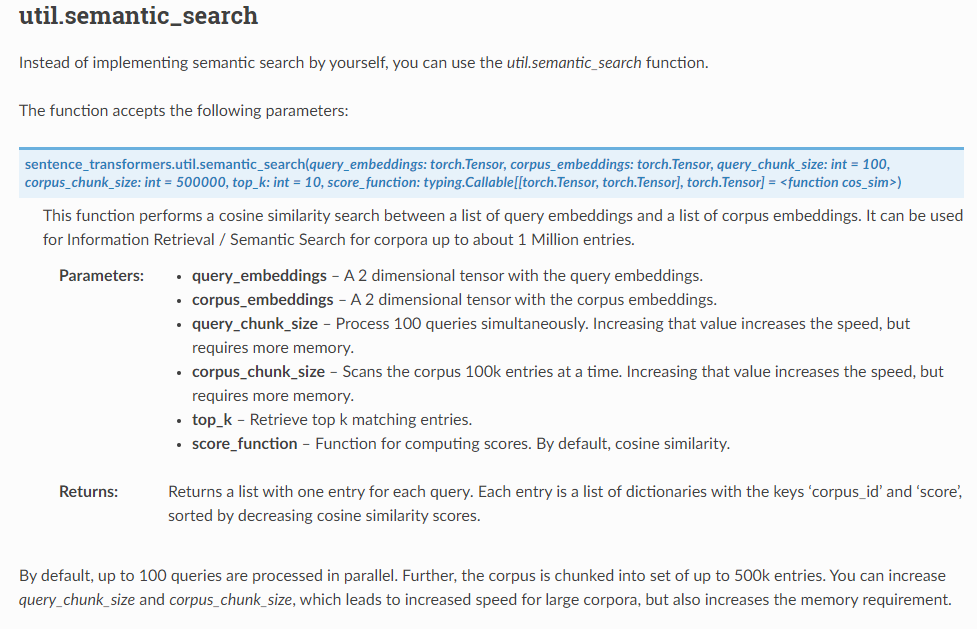

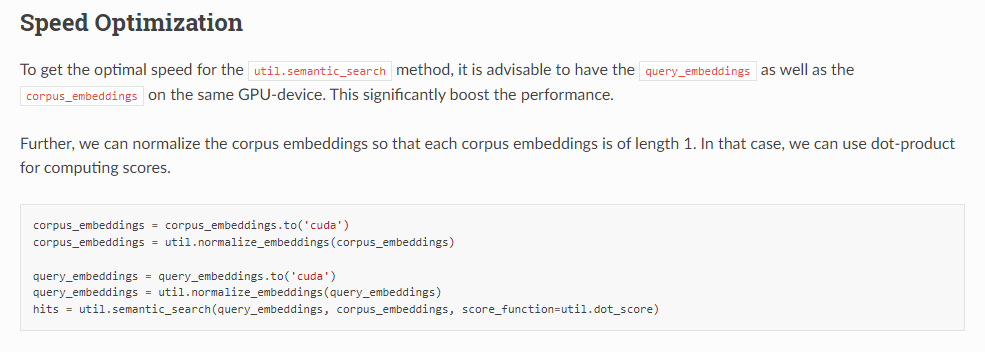

In [ ]:
%pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=88941f246ac671fdd0d06db6e3bb122b6fe861e53221f78836825628223d5f05
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer,util
import torch

In [ ]:
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/383 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
import requests

In [ ]:
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-queries.txt')
queries = response.text.split('\r\n')

In [ ]:
print(corpus)

['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']


In [ ]:
print(queries)

['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


In [ ]:
corpus_embedding = model.encode(corpus,convert_to_tensor=True)

In [ ]:
queries_embedding = model.encode(queries,convert_to_tensor=True)

In [ ]:
corpus_embedding = util.normalize_embeddings(corpus_embedding)

In [ ]:
queries_embedding = util.normalize_embeddings(queries_embedding)

In [ ]:
len(corpus_embedding[0])

384

In [ ]:
hits = util.semantic_search(queries_embedding,corpus_embedding,score_function=util.dot_score, top_k = 3)

In [ ]:
hits

[[{'corpus_id': 2, 'score': 1.0000001192092896},
  {'corpus_id': 0, 'score': 0.8384665250778198},
  {'corpus_id': 1, 'score': 0.7468276619911194}],
 [{'corpus_id': 8, 'score': 1.0000001192092896},
  {'corpus_id': 7, 'score': 0.7612733840942383},
  {'corpus_id': 3, 'score': 0.3815288245677948}],
 [{'corpus_id': 10, 'score': 1.0000001192092896},
  {'corpus_id': 9, 'score': 0.8703994154930115},
  {'corpus_id': 6, 'score': 0.37411707639694214}]]

In [ ]:
for query,hit in zip(queries,hits):
  for q_hit in hit:
    id = q_hit['corpus_id']
    score = q_hit["score"]
    print(query,"<>", corpus[id],"-->",score)
  print()

A man is eating pasta. <> A man is eating pasta. --> 1.0000001192092896
A man is eating pasta. <> A man is eating food. --> 0.8384665250778198
A man is eating pasta. <> A man is eating a piece of bread. --> 0.7468276619911194

Someone in a gorilla costume is playing a set of drums. <> Someone in a gorilla costume is playing a set of drums. --> 1.0000001192092896
Someone in a gorilla costume is playing a set of drums. <> A monkey is playing drums. --> 0.7612733840942383
Someone in a gorilla costume is playing a set of drums. <> The girl is carrying a baby. --> 0.3815288245677948

A cheetah chases prey on across a field. <> A cheetah chases prey on across a field. --> 1.0000001192092896
A cheetah chases prey on across a field. <> A cheetah is running behind its prey. --> 0.8703994154930115
A cheetah chases prey on across a field. <> A man is riding a white horse on an enclosed ground. --> 0.37411707639694214

